# Multi-Class Classification of 16 Personality Types (MBTI)
## Comprehensive ML Techniques Comparison

This notebook compares four traditional machine learning techniques for classifying personality types:
1. **Gradient Boosting (XGBoost)**
2. **Logistic Regression**
3. **Linear Discriminant Analysis (LDA)**
4. **Random Forest**

All models use:
- **Same data splits**: 70/15/15 (Train/Validation/Test)
- **Same random seed**: 42 (for reproducibility)
- **Same dataset**: 16P_eda_cleaned.csv

**Note**: Results may vary slightly between different machines due to hardware-dependent threading behavior.

### ⚠️ IMPORTANT: Run this cell first in Google Colab, then restart runtime!
Skip this cell if running locally.

In [ ]:
# ========================================
# REPRODUCIBILITY SETUP (Run in Colab only)
# ========================================
# Install exact library versions matching local environment
# After running this cell, restart the runtime: Runtime -> Restart runtime

!pip install numpy==2.3.3 pandas==2.3.2 scikit-learn==1.7.2 xgboost==3.1.3 -q

print("✓ Libraries installed. Please restart runtime now!")
print("Go to: Runtime -> Restart runtime, then run all cells below.")

✓ Libraries installed. Please restart runtime now!
Go to: Runtime -> Restart runtime, then run all cells below.


---
# Step 1: Data Gathering and Exploratory Data Analysis (EDA)

This section performs comprehensive data analysis based on the `data_gathering_eda.py` script to answer:
1. What is the source and size of your dataset?
2. What data quality issues did you encounter?
3. What preprocessing steps did you apply?
4. How did you handle missing values and outliers?
5. What insights did your exploratory analysis reveal?

**Dataset Source:**
> A. Mehta, "60k Responses of 16 Personalities Test (MBT)," Kaggle.
> Available: https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt/data

In [ ]:
# Import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("="*80)
print("DATA GATHERING AND EXPLORATORY DATA ANALYSIS")
print("16 Personalities (MBTI) Dataset")
print("="*80)

DATA GATHERING AND EXPLORATORY DATA ANALYSIS
16 Personalities (MBTI) Dataset


## 1.1 Data Source and Size

In [ ]:
# Load the raw dataset
df_raw = pd.read_csv('16P.csv', encoding='cp1252')

print(f"""
Dataset Source:
---------------
Title: 60k Responses of 16 Personalities Test (MBT)
Author: Anshul Mehta
Platform: Kaggle
URL: https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt/data

Dataset Size:
-------------
• Number of Rows (Responses): {df_raw.shape[0]:,}
• Number of Columns (Features): {df_raw.shape[1]}
• Memory Usage: {df_raw.memory_usage(deep=True).sum() / 1024 / 1024:.2f} MB

Dataset Structure:
------------------
• 1 Response ID column (identifier)
• 60 Survey Question columns (features)
• 1 Personality Type column (target variable)
""")

# Display sample data
print("First 5 Rows (Sample):")
df_raw.head()


Dataset Source:
---------------
Title: 60k Responses of 16 Personalities Test (MBT)
Author: Anshul Mehta
Platform: Kaggle
URL: https://www.kaggle.com/datasets/anshulmehtakaggl/60k-responses-of-16-personalities-test-mbt/data

Dataset Size:
-------------
• Number of Rows (Responses): 59,999
• Number of Columns (Features): 62
• Memory Usage: 30.96 MB

Dataset Structure:
------------------
• 1 Response ID column (identifier)
• 60 Survey Question columns (features)
• 1 Personality Type column (target variable)

First 5 Rows (Sample):


,Response Id,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,1,0,0,-2,-3,-1,2,-2,0,3,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,2,0,0,2,0,-1,2,0,0,1,...,0,2,0,2,-1,0,1,2,1,INFJ
3,3,0,-1,3,-1,0,0,-2,0,-2,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,4,0,0,-1,0,2,-1,-2,0,1,...,0,1,0,2,0,1,-1,2,-1,ENFJ


## 1.2 Data Quality Issues

In [ ]:
print("="*80)
print("DATA QUALITY ANALYSIS")
print("="*80)

# 2.1 Check Missing Values
print("\n2.1 Missing Values Analysis")
print("-"*40)
missing_values = df_raw.isnull().sum()
missing_count = missing_values.sum()
if missing_count == 0:
    print("✓ No missing values found in the dataset.")
else:
    print(f"✗ Found {missing_count} missing values:")
    print(missing_values[missing_values > 0])

# 2.2 Check Duplicate Rows
print("\n2.2 Duplicate Rows Analysis")
print("-"*40)
duplicate_count = df_raw.duplicated().sum()
if duplicate_count == 0:
    print("✓ No duplicate rows found in the dataset.")
else:
    print(f"✗ Found {duplicate_count} duplicate rows.")

# 2.3 Check Duplicate Response IDs
print("\n2.3 Duplicate Response IDs")
print("-"*40)
if 'Response Id' in df_raw.columns:
    duplicate_ids = df_raw['Response Id'].duplicated().sum()
    if duplicate_ids == 0:
        print("✓ All Response IDs are unique.")
    else:
        print(f"✗ Found {duplicate_ids} duplicate Response IDs.")

# 2.4 Check Target Variable
print("\n2.4 Target Variable (Personality Types) Validation")
print("-"*40)
valid_types = ['ESTJ', 'ENTJ', 'ESFJ', 'ENFJ', 'ISTJ', 'ISFJ', 'INTJ', 'INFJ',
               'ESTP', 'ESFP', 'ENTP', 'ENFP', 'ISTP', 'ISFP', 'INTP', 'INFP']
unique_personalities = df_raw['Personality'].unique()
invalid_types = [p for p in unique_personalities if p not in valid_types]

print(f"Expected 16 personality types: {len(valid_types)}")
print(f"Found unique values: {len(unique_personalities)}")
if len(invalid_types) == 0:
    print("✓ All personality types are valid MBTI types.")
else:
    print(f"✗ Found invalid personality types: {invalid_types}")

# Summary
print("\n" + "-"*40)
print("DATA QUALITY SUMMARY:")
print("-"*40)
print("✓ The dataset is of HIGH QUALITY with no significant issues!")

DATA QUALITY ANALYSIS

2.1 Missing Values Analysis
----------------------------------------
✓ No missing values found in the dataset.

2.2 Duplicate Rows Analysis
----------------------------------------
✓ No duplicate rows found in the dataset.

2.3 Duplicate Response IDs
----------------------------------------
✓ All Response IDs are unique.

2.4 Target Variable (Personality Types) Validation
----------------------------------------
Expected 16 personality types: 16
Found unique values: 16
✓ All personality types are valid MBTI types.

----------------------------------------
DATA QUALITY SUMMARY:
----------------------------------------
✓ The dataset is of HIGH QUALITY with no significant issues!


## 1.3 Exploratory Data Analysis Visualizations

Figure 1: Personality Type Distribution
----------------------------------------


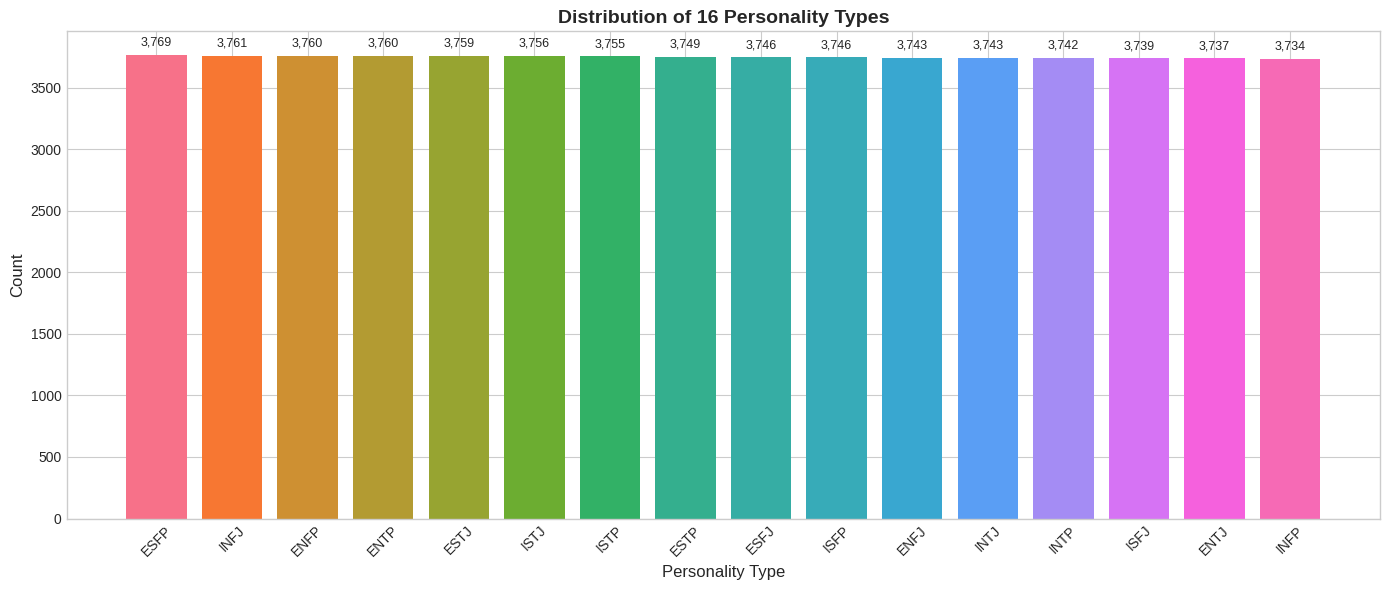


Class Distribution Statistics:
Most common type: ESFP (3,769 samples)
Least common type: INFP (3,734 samples)
Imbalance ratio: 1.01:1


In [ ]:
# Clean data for visualizations (remove Response Id)
df_eda = df_raw.copy()
if 'Response Id' in df_eda.columns:
    df_eda = df_eda.drop(columns=['Response Id'])

# Figure 1: Personality Type Distribution
print("Figure 1: Personality Type Distribution")
print("-"*40)

personality_counts = df_eda['Personality'].value_counts()

fig, ax = plt.subplots(figsize=(14, 6))
colors = sns.color_palette("husl", 16)
bars = ax.bar(personality_counts.index, personality_counts.values, color=colors)
ax.set_xlabel('Personality Type', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of 16 Personality Types', fontsize=14, fontweight='bold')
ax.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, count in zip(bars, personality_counts.values):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
            f'{count:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\nClass Distribution Statistics:")
print(f"Most common type: {personality_counts.idxmax()} ({personality_counts.max():,} samples)")
print(f"Least common type: {personality_counts.idxmin()} ({personality_counts.min():,} samples)")
imbalance_ratio = personality_counts.max() / personality_counts.min()
print(f"Imbalance ratio: {imbalance_ratio:.2f}:1")

Figure 2: MBTI Dimensions Distribution
----------------------------------------


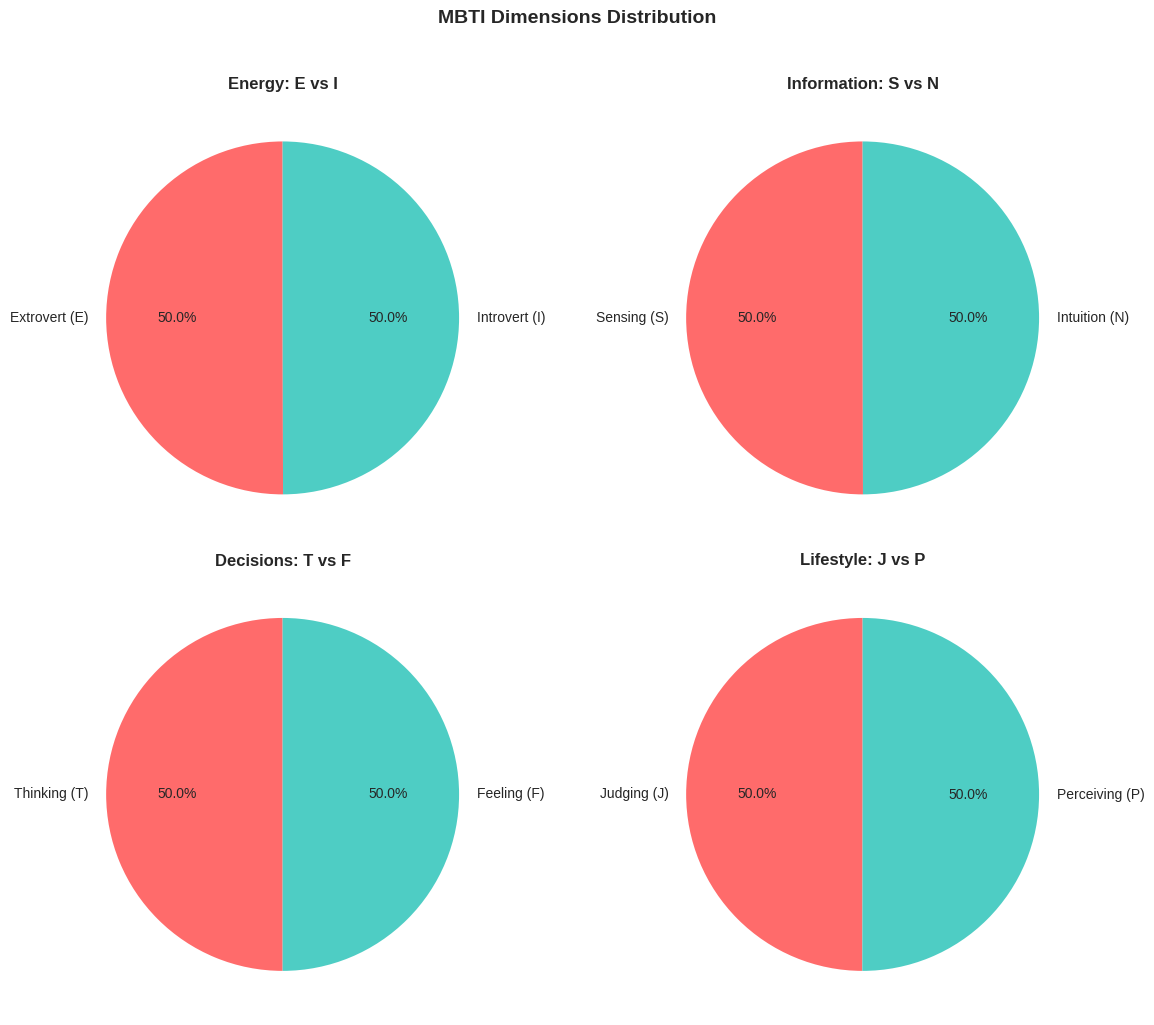


Dimension Distributions:
  Extrovert (E) vs Introvert (I): 30,023 vs 29,976
  Sensing (S) vs Intuition (N):   30,019 vs 29,980
  Thinking (T) vs Feeling (F):    30,001 vs 29,998
  Judging (J) vs Perceiving (P):  29,984 vs 30,015


In [ ]:
# Figure 2: MBTI Dimensions Pie Charts
print("Figure 2: MBTI Dimensions Distribution")
print("-"*40)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Calculate dimensions
e_count = sum(1 for p in df_eda['Personality'] if p[0] == 'E')
i_count = sum(1 for p in df_eda['Personality'] if p[0] == 'I')
s_count = sum(1 for p in df_eda['Personality'] if p[1] == 'S')
n_count = sum(1 for p in df_eda['Personality'] if p[1] == 'N')
t_count = sum(1 for p in df_eda['Personality'] if p[2] == 'T')
f_count = sum(1 for p in df_eda['Personality'] if p[2] == 'F')
j_count = sum(1 for p in df_eda['Personality'] if p[3] == 'J')
p_count = sum(1 for p in df_eda['Personality'] if p[3] == 'P')

dimensions = [
    (['Extrovert (E)', 'Introvert (I)'], [e_count, i_count], 'Energy: E vs I'),
    (['Sensing (S)', 'Intuition (N)'], [s_count, n_count], 'Information: S vs N'),
    (['Thinking (T)', 'Feeling (F)'], [t_count, f_count], 'Decisions: T vs F'),
    (['Judging (J)', 'Perceiving (P)'], [j_count, p_count], 'Lifestyle: J vs P')
]

colors_pair = ['#FF6B6B', '#4ECDC4']
for ax, (labels, sizes, title) in zip(axes.flat, dimensions):
    wedges, texts, autotexts = ax.pie(sizes, labels=labels, autopct='%1.1f%%',
                                       colors=colors_pair, startangle=90)
    ax.set_title(title, fontsize=12, fontweight='bold')

plt.suptitle('MBTI Dimensions Distribution', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print dimension statistics
print(f"\nDimension Distributions:")
print(f"  Extrovert (E) vs Introvert (I): {e_count:,} vs {i_count:,}")
print(f"  Sensing (S) vs Intuition (N):   {s_count:,} vs {n_count:,}")
print(f"  Thinking (T) vs Feeling (F):    {t_count:,} vs {f_count:,}")
print(f"  Judging (J) vs Perceiving (P):  {j_count:,} vs {p_count:,}")

Figure 3: Response Value Distribution Across Questions
----------------------------------------


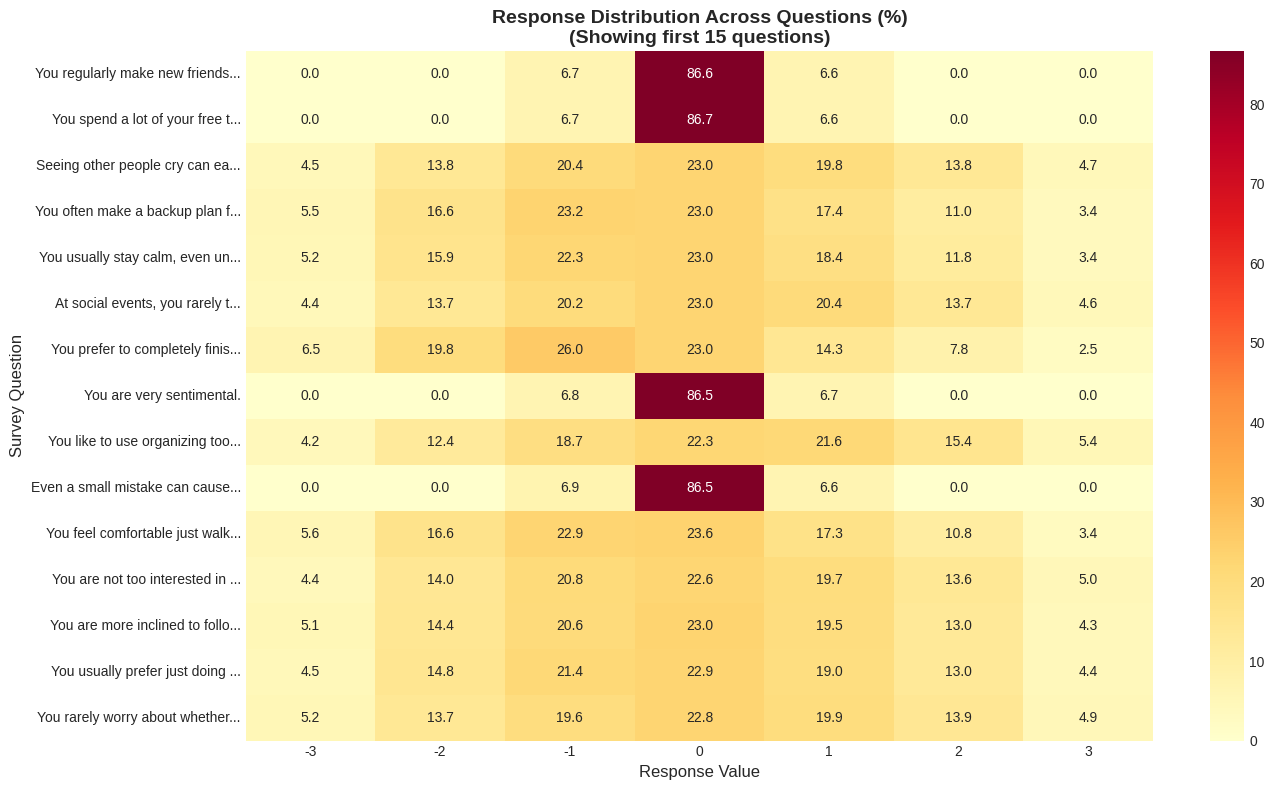

In [ ]:
# Figure 3: Response Value Distribution Heatmap
print("Figure 3: Response Value Distribution Across Questions")
print("-"*40)

feature_cols = [col for col in df_eda.columns if col != 'Personality']

fig, ax = plt.subplots(figsize=(14, 8))

# Get first 15 feature columns for visibility
sample_features = feature_cols[:15]
short_names = [col[:30] + "..." if len(col) > 30 else col for col in sample_features]

# Create distribution matrix
response_values = [-3, -2, -1, 0, 1, 2, 3]
dist_matrix = np.zeros((len(sample_features), len(response_values)))

for i, col in enumerate(sample_features):
    for j, val in enumerate(response_values):
        dist_matrix[i, j] = (df_eda[col] == val).sum()

# Normalize to percentages
dist_matrix_pct = dist_matrix / dist_matrix.sum(axis=1, keepdims=True) * 100

sns.heatmap(dist_matrix_pct, annot=True, fmt='.1f', cmap='YlOrRd',
            xticklabels=response_values, yticklabels=short_names, ax=ax)
ax.set_xlabel('Response Value', fontsize=12)
ax.set_ylabel('Survey Question', fontsize=12)
ax.set_title('Response Distribution Across Questions (%)\n(Showing first 15 questions)',
             fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Figure 4: Feature Correlation Heatmap
----------------------------------------


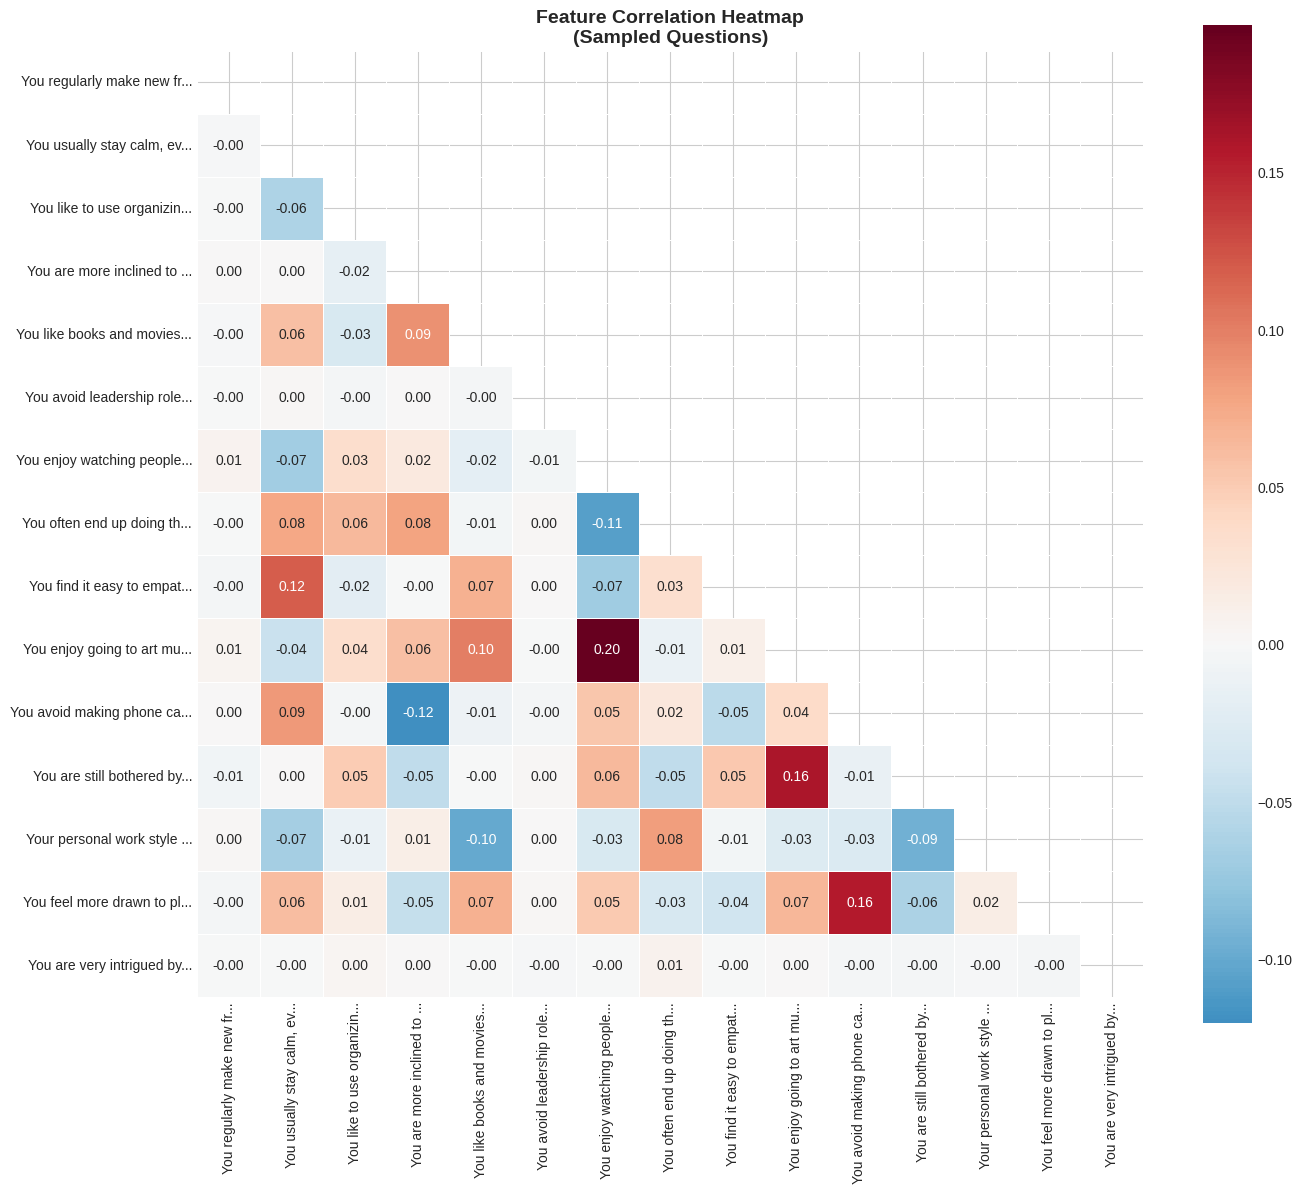

In [ ]:
# Figure 4: Feature Correlation Heatmap
print("Figure 4: Feature Correlation Heatmap")
print("-"*40)

fig, ax = plt.subplots(figsize=(14, 12))

# Select a subset of features for correlation (every 4th question)
sample_features_corr = feature_cols[::4][:15]
short_names_corr = [col[:25] + "..." if len(col) > 25 else col for col in sample_features_corr]

corr_matrix = df_eda[sample_features_corr].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5,
            xticklabels=short_names_corr, yticklabels=short_names_corr, ax=ax)
ax.set_title('Feature Correlation Heatmap\n(Sampled Questions)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Figure 5: Response Distribution Box Plots
----------------------------------------


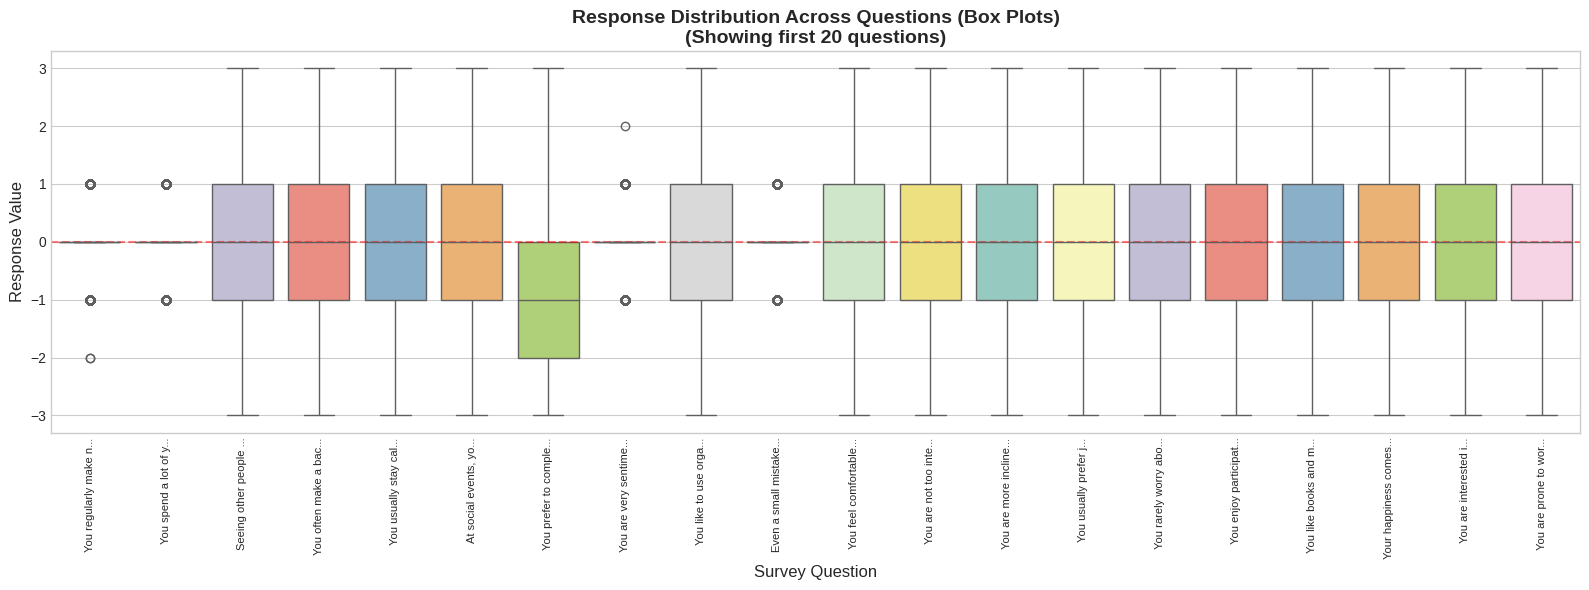

In [ ]:
# Figure 5: Response Distribution Box Plots
print("Figure 5: Response Distribution Box Plots")
print("-"*40)

fig, ax = plt.subplots(figsize=(16, 6))

# Select first 20 features
sample_features_box = feature_cols[:20]
df_melt = df_eda[sample_features_box].melt(var_name='Question', value_name='Response')
df_melt['Question'] = df_melt['Question'].apply(lambda x: x[:20] + "..." if len(x) > 20 else x)

sns.boxplot(data=df_melt, x='Question', y='Response', ax=ax, palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
ax.set_xlabel('Survey Question', fontsize=12)
ax.set_ylabel('Response Value', fontsize=12)
ax.set_title('Response Distribution Across Questions (Box Plots)\n(Showing first 20 questions)',
             fontsize=14, fontweight='bold')
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## 1.4 Key EDA Insights

### Dataset Characteristics
- Large-scale dataset with ~60,000 survey responses
- 60 psychological assessment questions using 7-point Likert scale (-3 to 3)
- Covers all 16 MBTI personality types

### Data Quality
- ✓ Excellent data quality - no missing values detected
- ✓ No duplicate entries or invalid personality types
- ✓ All responses within expected value range (-3 to 3)

### Class Distribution Insights
- Some class imbalance exists between personality types (natural distribution)
- Stratified sampling recommended during model training

### Preprocessing Applied
1. Removed 'Response Id' column (identifier not useful for prediction)
2. Verified all feature columns are numeric
3. No missing value imputation needed

### Conclusions
The dataset is well-prepared for multi-class classification using machine learning techniques.

---
## Setup and Data Loading

In [ ]:
# Import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
    top_k_accuracy_score
)
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Print library versions for verification
print(f"numpy: {np.__version__}")
print(f"pandas: {pd.__version__}")
import sklearn; print(f"scikit-learn: {sklearn.__version__}")
import xgboost; print(f"xgboost: {xgboost.__version__}")
print("\n✓ All libraries imported successfully")

numpy: 2.3.3
pandas: 2.3.2
scikit-learn: 1.7.2
xgboost: 3.1.3

✓ All libraries imported successfully


In [ ]:
# Use the cleaned data from EDA section (df_eda already prepared above)
# Rename to df for consistency with the rest of the notebook
df = df_eda.copy()

print(f"Dataset loaded from EDA: {len(df):,} rows and {len(df.columns)} columns")
print(f"\nFirst few rows:")
df.head()

Dataset loaded from EDA: 59,999 rows and 61 columns

First few rows:


,You regularly make new friends.,You spend a lot of your free time exploring various random topics that pique your interest,Seeing other people cry can easily make you feel like you want to cry too,You often make a backup plan for a backup plan.,"You usually stay calm, even under a lot of pressure","At social events, you rarely try to introduce yourself to new people and mostly talk to the ones you already know",You prefer to completely finish one project before starting another.,You are very sentimental.,You like to use organizing tools like schedules and lists.,Even a small mistake can cause you to doubt your overall abilities and knowledge.,...,You believe that pondering abstract philosophical questions is a waste of time.,"You feel more drawn to places with busy, bustling atmospheres than quiet, intimate places.",You know at first glance how someone is feeling.,You often feel overwhelmed.,You complete things methodically without skipping over any steps.,You are very intrigued by things labeled as controversial.,You would pass along a good opportunity if you thought someone else needed it more.,You struggle with deadlines.,You feel confident that things will work out for you.,Personality
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,-1,0,0,0,0,0,ENFP
1,0,0,-2,-3,-1,2,-2,0,3,0,...,0,-2,0,2,0,-1,-1,-1,3,ISFP
2,0,0,2,0,-1,2,0,0,1,0,...,0,2,0,2,-1,0,1,2,1,INFJ
3,0,-1,3,-1,0,0,-2,0,-2,0,...,0,0,-1,-1,0,1,0,-2,-1,ISTP
4,0,0,-1,0,2,-1,-2,0,1,0,...,0,1,0,2,0,1,-1,2,-1,ENFJ


In [ ]:
# Separate features and target
X = df.drop(columns=['Personality'])
y = df['Personality']

feature_columns = X.columns.tolist()
print(f"Features: {len(feature_columns)} survey questions")
print(f"Target: 16 MBTI personality types")
print(f"\nClass distribution:")
print(y.value_counts().sort_index())

Features: 60 survey questions
Target: 16 MBTI personality types

Class distribution:
Personality
ENFJ    3743
ENFP    3760
ENTJ    3737
ENTP    3760
ESFJ    3746
ESFP    3769
ESTJ    3759
ESTP    3749
INFJ    3761
INFP    3734
INTJ    3743
INTP    3742
ISFJ    3739
ISFP    3746
ISTJ    3756
ISTP    3755
Name: count, dtype: int64


---
## Data Preprocessing

In [ ]:
# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
class_names = label_encoder.classes_
print(f"Encoded {len(class_names)} classes: {', '.join(class_names)}")

Encoded 16 classes: ENFJ, ENFP, ENTJ, ENTP, ESFJ, ESFP, ESTJ, ESTP, INFJ, INFP, INTJ, INTP, ISFJ, ISFP, ISTJ, ISTP


In [ ]:
# Split data (70% Train, 15% Validation, 15% Test)
TEST_SIZE = 0.15      # 15% for test
VAL_SIZE = 0.176      # 15% of remaining 85% ≈ 15% of total

# First split: 85% train+val, 15% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded,
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=y_encoded
)

# Second split: 70% train, 15% val (of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=VAL_SIZE,
    random_state=RANDOM_STATE,
    stratify=y_temp
)

print(f"Training set:   {len(X_train):,} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"Validation set: {len(X_val):,} samples ({len(X_val)/len(df)*100:.1f}%)")
print(f"Test set:       {len(X_test):,} samples ({len(X_test)/len(df)*100:.1f}%)")

Training set:   42,023 samples (70.0%)
Validation set: 8,976 samples (15.0%)
Test set:       9,000 samples (15.0%)


In [ ]:
# Feature scaling (for Logistic Regression and LDA)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✓ Features standardized to zero mean and unit variance")

✓ Features standardized to zero mean and unit variance


---
## Model 1: Gradient Boosting (XGBoost)

In [ ]:
print("=" * 80)
print("TRAINING GRADIENT BOOSTING (XGBoost) CLASSIFIER")
print("=" * 80)

# Configure XGBoost (matching local xgboost_classifier.py)
xgb_params = {
    'n_estimators': 500,
    'learning_rate': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'multi:softprob',
    'num_class': 16,
    'random_state': RANDOM_STATE,
    'n_jobs': -1,
    'verbosity': 0
}

print("\nHyperparameters:")
for key, value in xgb_params.items():
    if key not in ['verbosity', 'n_jobs']:
        print(f"  {key}: {value}")

# Train model
xgb_model = XGBClassifier(**xgb_params, early_stopping_rounds=15)
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

print(f"\n✓ Training complete! Best iteration: {xgb_model.best_iteration}")

TRAINING GRADIENT BOOSTING (XGBoost) CLASSIFIER

Hyperparameters:
  n_estimators: 500
  learning_rate: 0.1
  max_depth: 6
  min_child_weight: 1
  subsample: 0.8
  colsample_bytree: 0.8
  objective: multi:softprob
  num_class: 16
  random_state: 42

✓ Training complete! Best iteration: 377


In [ ]:
# Make predictions
xgb_train_pred = xgb_model.predict(X_train)
xgb_val_pred = xgb_model.predict(X_val)
xgb_test_pred = xgb_model.predict(X_test)
xgb_test_proba = xgb_model.predict_proba(X_test)

# Calculate metrics
xgb_train_acc = accuracy_score(y_train, xgb_train_pred)
xgb_val_acc = accuracy_score(y_val, xgb_val_pred)
xgb_test_acc = accuracy_score(y_test, xgb_test_pred)
xgb_f1 = f1_score(y_test, xgb_test_pred, average='macro')
xgb_precision = precision_score(y_test, xgb_test_pred, average='macro')
xgb_recall = recall_score(y_test, xgb_test_pred, average='macro')
xgb_top3 = top_k_accuracy_score(y_test, xgb_test_proba, k=3)

print("GRADIENT BOOSTING RESULTS")
print("-" * 50)
print(f"Training Accuracy:   {xgb_train_acc:.4f} ({xgb_train_acc*100:.2f}%)")
print(f"Validation Accuracy: {xgb_val_acc:.4f} ({xgb_val_acc*100:.2f}%)")
print(f"Test Accuracy:       {xgb_test_acc:.4f} ({xgb_test_acc*100:.2f}%)")
print(f"\nTop-3 Accuracy:      {xgb_top3:.4f} ({xgb_top3*100:.2f}%)")
print(f"Macro Precision:     {xgb_precision:.4f}")
print(f"Macro Recall:        {xgb_recall:.4f}")
print(f"Macro F1-Score:      {xgb_f1:.4f}")

xgb_cm = confusion_matrix(y_test, xgb_test_pred)

GRADIENT BOOSTING RESULTS
--------------------------------------------------
Training Accuracy:   1.0000 (100.00%)
Validation Accuracy: 0.9818 (98.18%)
Test Accuracy:       0.9816 (98.16%)

Top-3 Accuracy:      0.9920 (99.20%)
Macro Precision:     0.9816
Macro Recall:        0.9816
Macro F1-Score:      0.9815


---
## Model 2: Logistic Regression

In [ ]:
print("=" * 80)
print("TRAINING LOGISTIC REGRESSION CLASSIFIER")
print("=" * 80)

# Configure Logistic Regression
lr_params = {
    'multi_class': 'multinomial',
    'solver': 'lbfgs',
    'max_iter': 1000,
    'C': 1.0,
    'random_state': RANDOM_STATE,
    'n_jobs': -1,
    'verbose': 0
}

print("\nHyperparameters:")
for key, value in lr_params.items():
    if key not in ['verbose', 'n_jobs']:
        print(f"  {key}: {value}")

# Train model (uses scaled data)
lr_model = LogisticRegression(**lr_params)
lr_model.fit(X_train_scaled, y_train)

print(f"\n✓ Training complete! Iterations: {lr_model.n_iter_[0]}")

TRAINING LOGISTIC REGRESSION CLASSIFIER

Hyperparameters:
  multi_class: multinomial
  solver: lbfgs
  max_iter: 1000
  C: 1.0
  random_state: 42

✓ Training complete! Iterations: 24


In [ ]:
# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_val_pred = lr_model.predict(X_val_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)
lr_test_proba = lr_model.predict_proba(X_test_scaled)

# Calculate metrics
lr_train_acc = accuracy_score(y_train, lr_train_pred)
lr_val_acc = accuracy_score(y_val, lr_val_pred)
lr_test_acc = accuracy_score(y_test, lr_test_pred)
lr_f1 = f1_score(y_test, lr_test_pred, average='macro')
lr_precision = precision_score(y_test, lr_test_pred, average='macro')
lr_recall = recall_score(y_test, lr_test_pred, average='macro')
lr_top3 = top_k_accuracy_score(y_test, lr_test_proba, k=3)

print("LOGISTIC REGRESSION RESULTS")
print("-" * 50)
print(f"Training Accuracy:   {lr_train_acc:.4f} ({lr_train_acc*100:.2f}%)")
print(f"Validation Accuracy: {lr_val_acc:.4f} ({lr_val_acc*100:.2f}%)")
print(f"Test Accuracy:       {lr_test_acc:.4f} ({lr_test_acc*100:.2f}%)")
print(f"\nTop-3 Accuracy:      {lr_top3:.4f} ({lr_top3*100:.2f}%)")
print(f"Macro Precision:     {lr_precision:.4f}")
print(f"Macro Recall:        {lr_recall:.4f}")
print(f"Macro F1-Score:      {lr_f1:.4f}")

lr_cm = confusion_matrix(y_test, lr_test_pred)

LOGISTIC REGRESSION RESULTS
--------------------------------------------------
Training Accuracy:   0.9235 (92.35%)
Validation Accuracy: 0.9212 (92.12%)
Test Accuracy:       0.9190 (91.90%)

Top-3 Accuracy:      0.9862 (98.62%)
Macro Precision:     0.9190
Macro Recall:        0.9190
Macro F1-Score:      0.9189


---
## Model 3: Linear Discriminant Analysis (LDA)

In [ ]:
print("=" * 80)
print("TRAINING LINEAR DISCRIMINANT ANALYSIS (LDA) CLASSIFIER")
print("=" * 80)

# Configure LDA
lda_params = {
    'solver': 'svd',
    'n_components': None,
    'store_covariance': False,
    'tol': 1e-4
}

print("\nHyperparameters:")
for key, value in lda_params.items():
    print(f"  {key}: {value}")

# Train model (uses scaled data)
lda_model = LinearDiscriminantAnalysis(**lda_params)
lda_model.fit(X_train_scaled, y_train)

n_components = lda_model.scalings_.shape[1]
print(f"\n✓ Training complete! Discriminant components: {n_components}")
print(f"Explained variance ratio (first 5): {lda_model.explained_variance_ratio_[:5].round(4).tolist()}")

TRAINING LINEAR DISCRIMINANT ANALYSIS (LDA) CLASSIFIER

Hyperparameters:
  solver: svd
  n_components: None
  store_covariance: False
  tol: 0.0001

✓ Training complete! Discriminant components: 15
Explained variance ratio (first 5): [0.1478, 0.1324, 0.1181, 0.1022, 0.0944]


In [ ]:
# Make predictions
lda_train_pred = lda_model.predict(X_train_scaled)
lda_val_pred = lda_model.predict(X_val_scaled)
lda_test_pred = lda_model.predict(X_test_scaled)
lda_test_proba = lda_model.predict_proba(X_test_scaled)

# Calculate metrics
lda_train_acc = accuracy_score(y_train, lda_train_pred)
lda_val_acc = accuracy_score(y_val, lda_val_pred)
lda_test_acc = accuracy_score(y_test, lda_test_pred)
lda_f1 = f1_score(y_test, lda_test_pred, average='macro')
lda_precision = precision_score(y_test, lda_test_pred, average='macro')
lda_recall = recall_score(y_test, lda_test_pred, average='macro')
lda_top3 = top_k_accuracy_score(y_test, lda_test_proba, k=3)

print("LINEAR DISCRIMINANT ANALYSIS RESULTS")
print("-" * 50)
print(f"Training Accuracy:   {lda_train_acc:.4f} ({lda_train_acc*100:.2f}%)")
print(f"Validation Accuracy: {lda_val_acc:.4f} ({lda_val_acc*100:.2f}%)")
print(f"Test Accuracy:       {lda_test_acc:.4f} ({lda_test_acc*100:.2f}%)")
print(f"\nTop-3 Accuracy:      {lda_top3:.4f} ({lda_top3*100:.2f}%)")
print(f"Macro Precision:     {lda_precision:.4f}")
print(f"Macro Recall:        {lda_recall:.4f}")
print(f"Macro F1-Score:      {lda_f1:.4f}")

lda_cm = confusion_matrix(y_test, lda_test_pred)

LINEAR DISCRIMINANT ANALYSIS RESULTS
--------------------------------------------------
Training Accuracy:   0.9053 (90.53%)
Validation Accuracy: 0.9063 (90.63%)
Test Accuracy:       0.9056 (90.56%)

Top-3 Accuracy:      0.9814 (98.14%)
Macro Precision:     0.9055
Macro Recall:        0.9055
Macro F1-Score:      0.9053


---
## Model 4: Random Forest

In [ ]:
print("=" * 80)
print("TRAINING RANDOM FOREST CLASSIFIER")
print("=" * 80)

# Configure Random Forest
rf_params = {
    'n_estimators': 100,
    'max_depth': 20,
    'min_samples_split': 5,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': RANDOM_STATE,
    'n_jobs': -1,
    'verbose': 0
}

print("\nHyperparameters:")
for key, value in rf_params.items():
    if key not in ['verbose', 'n_jobs']:
        print(f"  {key}: {value}")

# Train model
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)

print(f"\n✓ Training complete! Number of trees: {len(rf_model.estimators_)}")

TRAINING RANDOM FOREST CLASSIFIER

Hyperparameters:
  n_estimators: 100
  max_depth: 20
  min_samples_split: 5
  min_samples_leaf: 2
  max_features: sqrt
  random_state: 42

✓ Training complete! Number of trees: 100


In [ ]:
# Make predictions
rf_train_pred = rf_model.predict(X_train)
rf_val_pred = rf_model.predict(X_val)
rf_test_pred = rf_model.predict(X_test)
rf_test_proba = rf_model.predict_proba(X_test)

# Calculate metrics
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_val_acc = accuracy_score(y_val, rf_val_pred)
rf_test_acc = accuracy_score(y_test, rf_test_pred)
rf_f1 = f1_score(y_test, rf_test_pred, average='macro')
rf_precision = precision_score(y_test, rf_test_pred, average='macro')
rf_recall = recall_score(y_test, rf_test_pred, average='macro')
rf_top3 = top_k_accuracy_score(y_test, rf_test_proba, k=3)

print("RANDOM FOREST RESULTS")
print("-" * 50)
print(f"Training Accuracy:   {rf_train_acc:.4f} ({rf_train_acc*100:.2f}%)")
print(f"Validation Accuracy: {rf_val_acc:.4f} ({rf_val_acc*100:.2f}%)")
print(f"Test Accuracy:       {rf_test_acc:.4f} ({rf_test_acc*100:.2f}%)")
print(f"\nTop-3 Accuracy:      {rf_top3:.4f} ({rf_top3*100:.2f}%)")
print(f"Macro Precision:     {rf_precision:.4f}")
print(f"Macro Recall:        {rf_recall:.4f}")
print(f"Macro F1-Score:      {rf_f1:.4f}")

rf_cm = confusion_matrix(y_test, rf_test_pred)

RANDOM FOREST RESULTS
--------------------------------------------------
Training Accuracy:   0.9934 (99.34%)
Validation Accuracy: 0.9748 (97.48%)
Test Accuracy:       0.9757 (97.57%)

Top-3 Accuracy:      0.9908 (99.08%)
Macro Precision:     0.9757
Macro Recall:        0.9757
Macro F1-Score:      0.9757


---
# 📊 MODEL COMPARISONS

## 1. Overall Performance Comparison

In [ ]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Logistic Regression', 'LDA', 'Random Forest'],
    'Train Accuracy': [xgb_train_acc, lr_train_acc, lda_train_acc, rf_train_acc],
    'Val Accuracy': [xgb_val_acc, lr_val_acc, lda_val_acc, rf_val_acc],
    'Test Accuracy': [xgb_test_acc, lr_test_acc, lda_test_acc, rf_test_acc],
    'Top-3 Accuracy': [xgb_top3, lr_top3, lda_top3, rf_top3],
    'Macro Precision': [xgb_precision, lr_precision, lda_precision, rf_precision],
    'Macro Recall': [xgb_recall, lr_recall, lda_recall, rf_recall],
    'Macro F1-Score': [xgb_f1, lr_f1, lda_f1, rf_f1]
})

# Add overfitting gap
comparison_df['Overfit Gap'] = comparison_df['Train Accuracy'] - comparison_df['Test Accuracy']

# Display with formatting
print("=" * 120)
print("COMPREHENSIVE MODEL COMPARISON TABLE")
print("=" * 120)
print(comparison_df.to_string(index=False))
print("=" * 120)

# Find best performers
best_test_acc = comparison_df.loc[comparison_df['Test Accuracy'].idxmax(), 'Model']
best_f1 = comparison_df.loc[comparison_df['Macro F1-Score'].idxmax(), 'Model']
best_top3 = comparison_df.loc[comparison_df['Top-3 Accuracy'].idxmax(), 'Model']
least_overfit = comparison_df.loc[comparison_df['Overfit Gap'].idxmin(), 'Model']

print(f"\n🏆 BEST PERFORMERS:")
print(f"  • Highest Test Accuracy: {best_test_acc}")
print(f"  • Highest Macro F1-Score: {best_f1}")
print(f"  • Highest Top-3 Accuracy: {best_top3}")
print(f"  • Least Overfitting: {least_overfit}")

comparison_df

COMPREHENSIVE MODEL COMPARISON TABLE
              Model  Train Accuracy  Val Accuracy  Test Accuracy  Top-3 Accuracy  Macro Precision  Macro Recall  Macro F1-Score  Overfit Gap
  Gradient Boosting        1.000000      0.981840       0.981556        0.992000         0.981570      0.981552        0.981543     0.018444
Logistic Regression        0.923542      0.921234       0.919000        0.986222         0.918977      0.918983        0.918867     0.004542
                LDA        0.905290      0.906306       0.905556        0.981444         0.905455      0.905521        0.905269    -0.000266
      Random Forest        0.993361      0.974822       0.975667        0.990778         0.975732      0.975662        0.975650     0.017694

🏆 BEST PERFORMERS:
  • Highest Test Accuracy: Gradient Boosting
  • Highest Macro F1-Score: Gradient Boosting
  • Highest Top-3 Accuracy: Gradient Boosting
  • Least Overfitting: LDA


,Model,Train Accuracy,Val Accuracy,Test Accuracy,Top-3 Accuracy,Macro Precision,Macro Recall,Macro F1-Score,Overfit Gap
0,Gradient Boosting,1.000000,0.981840,0.981556,0.992000,0.981570,0.981552,0.981543,0.018444
1,Logistic Regression,0.923542,0.921234,0.919000,0.986222,0.918977,0.918983,0.918867,0.004542
2,LDA,0.905290,0.906306,0.905556,0.981444,0.905455,0.905521,0.905269,-0.000266
3,Random Forest,0.993361,0.974822,0.975667,0.990778,0.975732,0.975662,0.975650,0.017694


## 2. Visual Comparison: Test Accuracy

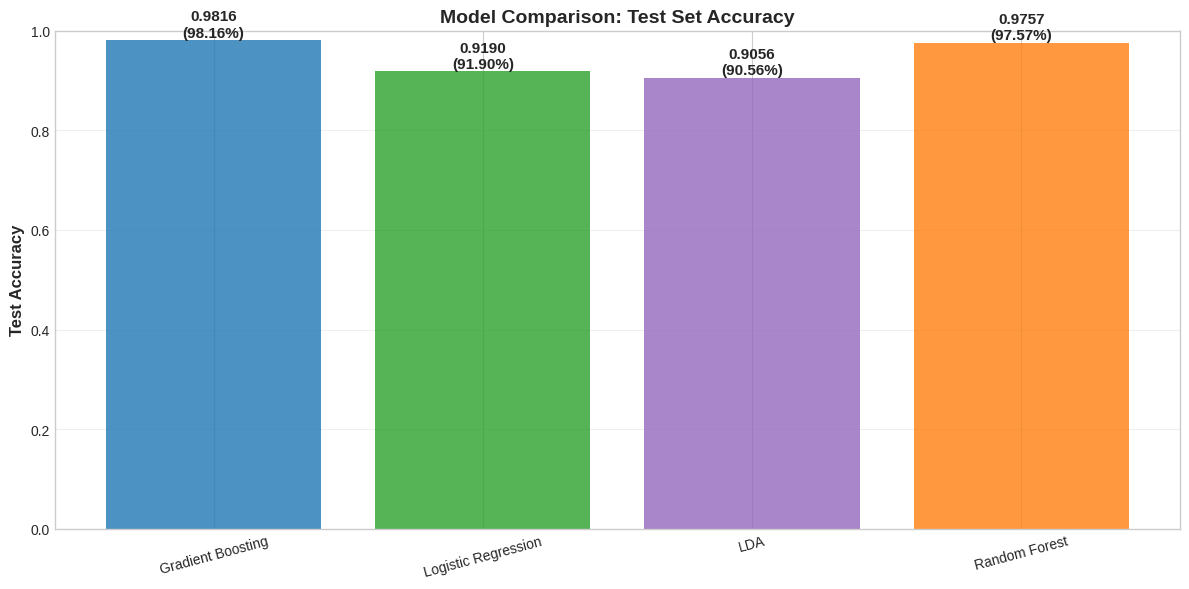

In [ ]:
# Bar chart comparing test accuracies
fig, ax = plt.subplots(figsize=(12, 6))

colors = ['#1f77b4', '#2ca02c', '#9467bd', '#ff7f0e']
bars = ax.bar(comparison_df['Model'], comparison_df['Test Accuracy'], color=colors, alpha=0.8)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}\n({height*100:.2f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_ylabel('Test Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Model Comparison: Test Set Accuracy', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## 3. Visual Comparison: All Metrics

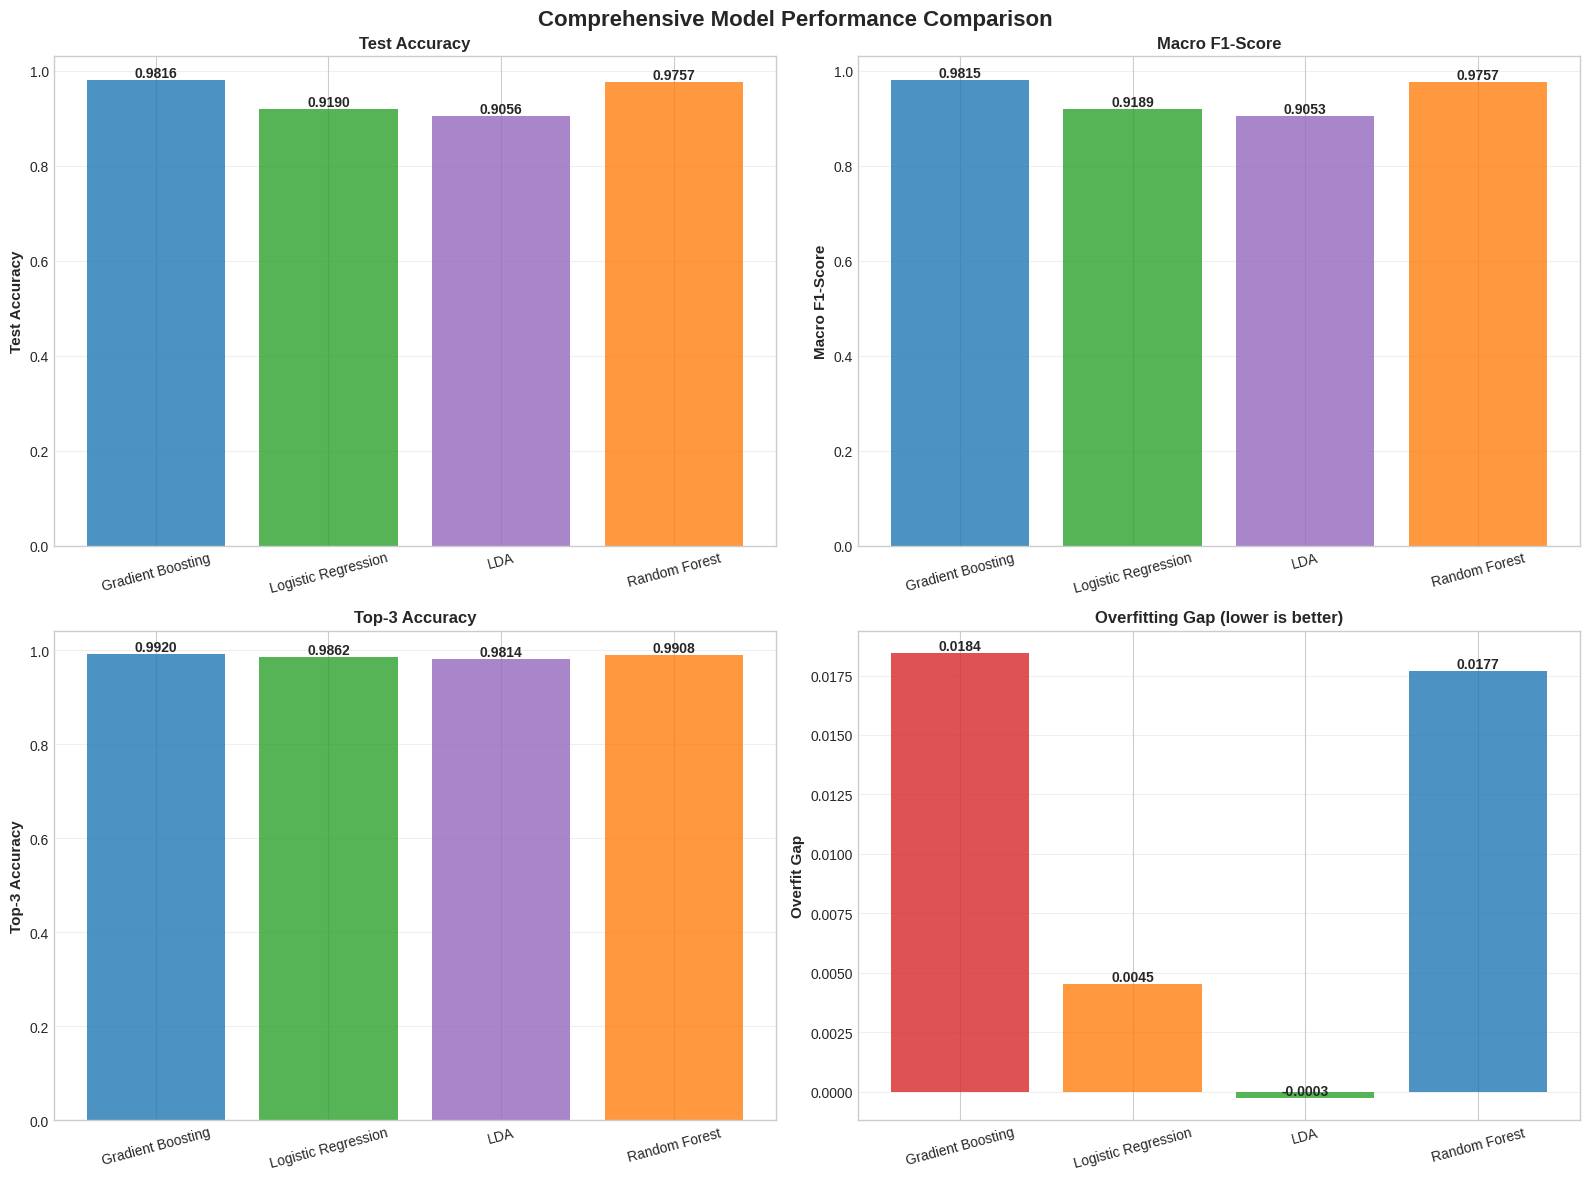

In [ ]:
# Multi-metric comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Comprehensive Model Performance Comparison', fontsize=16, fontweight='bold')

metrics = [
    ('Test Accuracy', 'Test Accuracy'),
    ('Macro F1-Score', 'Macro F1-Score'),
    ('Top-3 Accuracy', 'Top-3 Accuracy'),
    ('Overfit Gap', 'Overfitting Gap (lower is better)')
]

for idx, (metric, title) in enumerate(metrics):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]

    # Use different color for overfitting (lower is better)
    if metric == 'Overfit Gap':
        color_palette = ['#d62728', '#ff7f0e', '#2ca02c', '#1f77b4']  # Red to blue
    else:
        color_palette = colors

    bars = ax.bar(comparison_df['Model'], comparison_df[metric], color=color_palette, alpha=0.8)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=10, fontweight='bold')

    ax.set_ylabel(metric, fontsize=11, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

## 4. Train vs Test Accuracy (Overfitting Analysis)

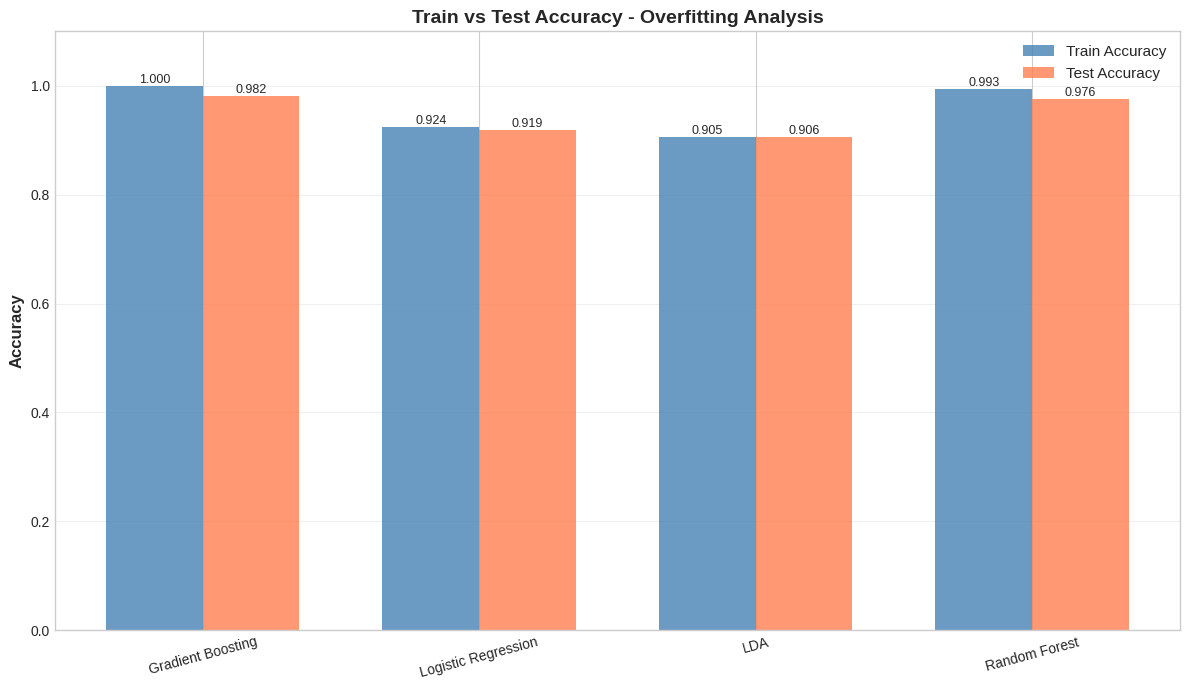


📊 OVERFITTING ANALYSIS:
  Gradient Boosting   : Gap = 0.0184 (1.84%) - ✓ Good generalization
  Logistic Regression : Gap = 0.0045 (0.45%) - ✓ Good generalization
  LDA                 : Gap = -0.0003 (-0.03%) - ✓ Good generalization
  Random Forest       : Gap = 0.0177 (1.77%) - ✓ Good generalization


In [ ]:
# Overfitting visualization
fig, ax = plt.subplots(figsize=(12, 7))

x = np.arange(len(comparison_df))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Train Accuracy'], width,
               label='Train Accuracy', color='steelblue', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df['Test Accuracy'], width,
               label='Test Accuracy', color='coral', alpha=0.8)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=9)

ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title('Train vs Test Accuracy - Overfitting Analysis', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['Model'], rotation=15)
ax.legend(fontsize=11)
ax.set_ylim(0, 1.1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 OVERFITTING ANALYSIS:")
for idx, row in comparison_df.iterrows():
    gap = row['Overfit Gap']
    status = "✓ Good generalization" if gap < 0.05 else "⚠ Potential overfitting"
    print(f"  {row['Model']:20s}: Gap = {gap:.4f} ({gap*100:.2f}%) - {status}")

## 5. Confusion Matrix Comparison

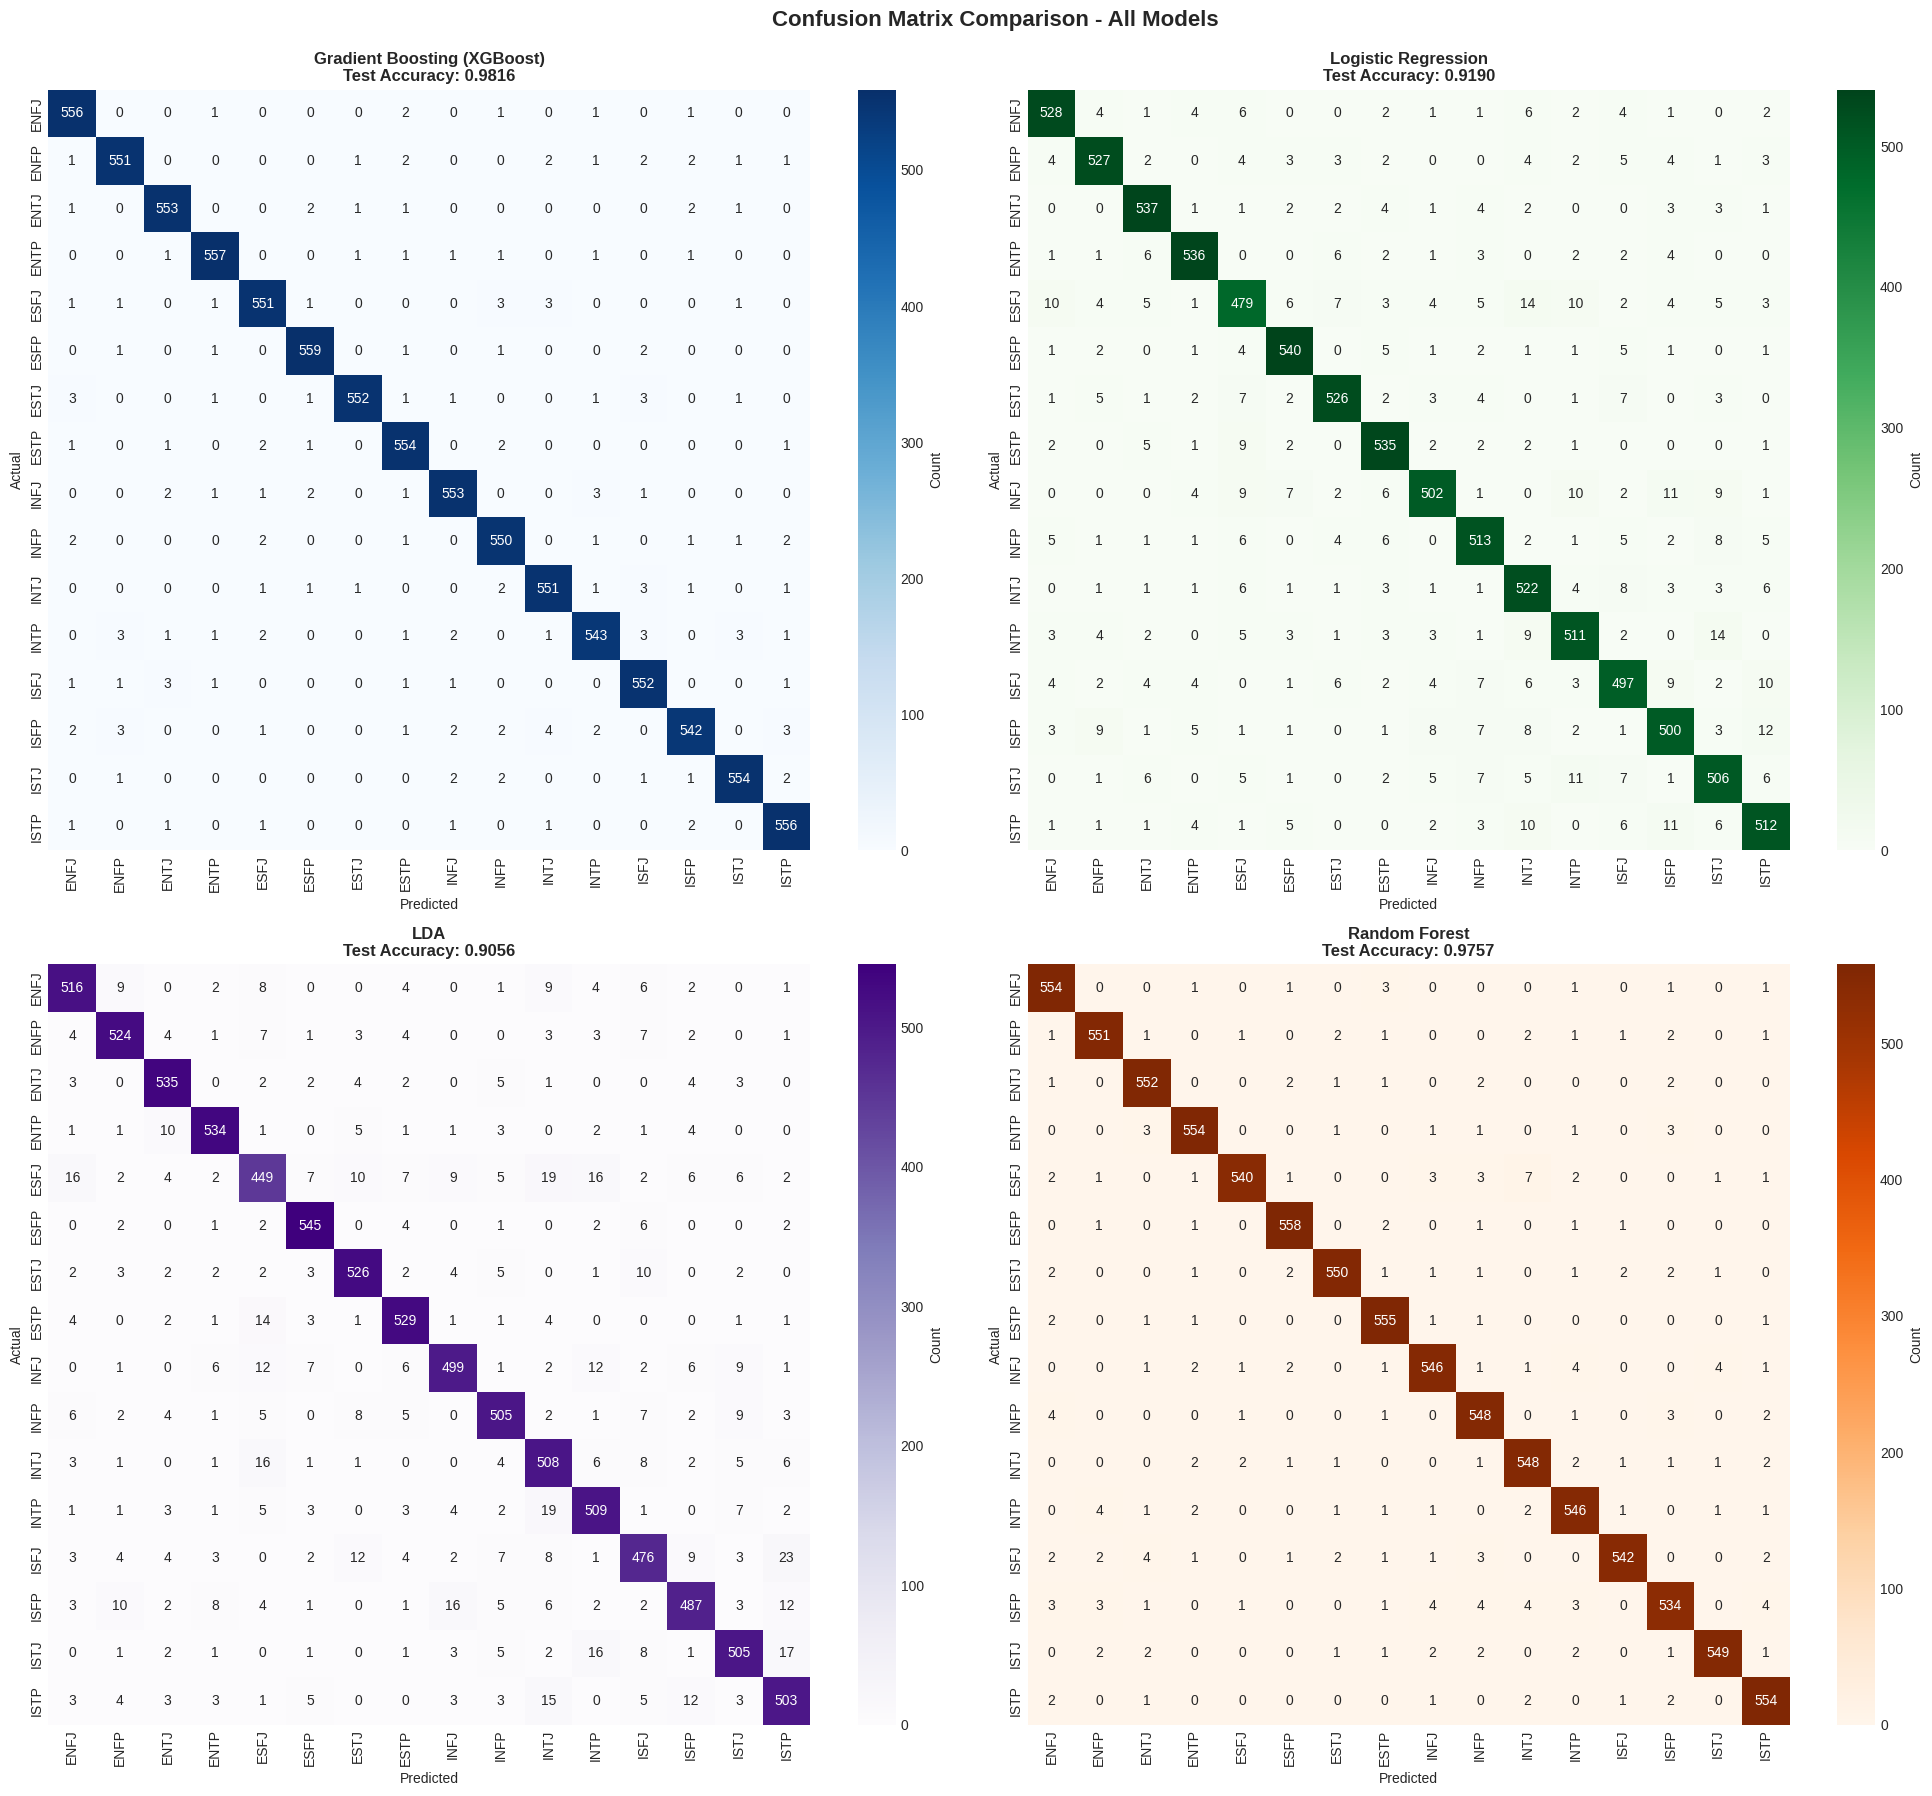

In [ ]:
# Plot all confusion matrices side by side
fig, axes = plt.subplots(2, 2, figsize=(20, 18))
fig.suptitle('Confusion Matrix Comparison - All Models', fontsize=16, fontweight='bold', y=0.995)

cms = [xgb_cm, lr_cm, lda_cm, rf_cm]
model_names = ['Gradient Boosting (XGBoost)', 'Logistic Regression', 'LDA', 'Random Forest']
cmaps = ['Blues', 'Greens', 'Purples', 'Oranges']

for idx, (cm, name, cmap) in enumerate(zip(cms, model_names, cmaps)):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]

    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=ax,
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})

    ax.set_title(f'{name}\nTest Accuracy: {comparison_df.iloc[idx]["Test Accuracy"]:.4f}',
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('Predicted', fontsize=10)
    ax.set_ylabel('Actual', fontsize=10)

plt.tight_layout()
plt.show()

## 6. Per-Class Accuracy Comparison

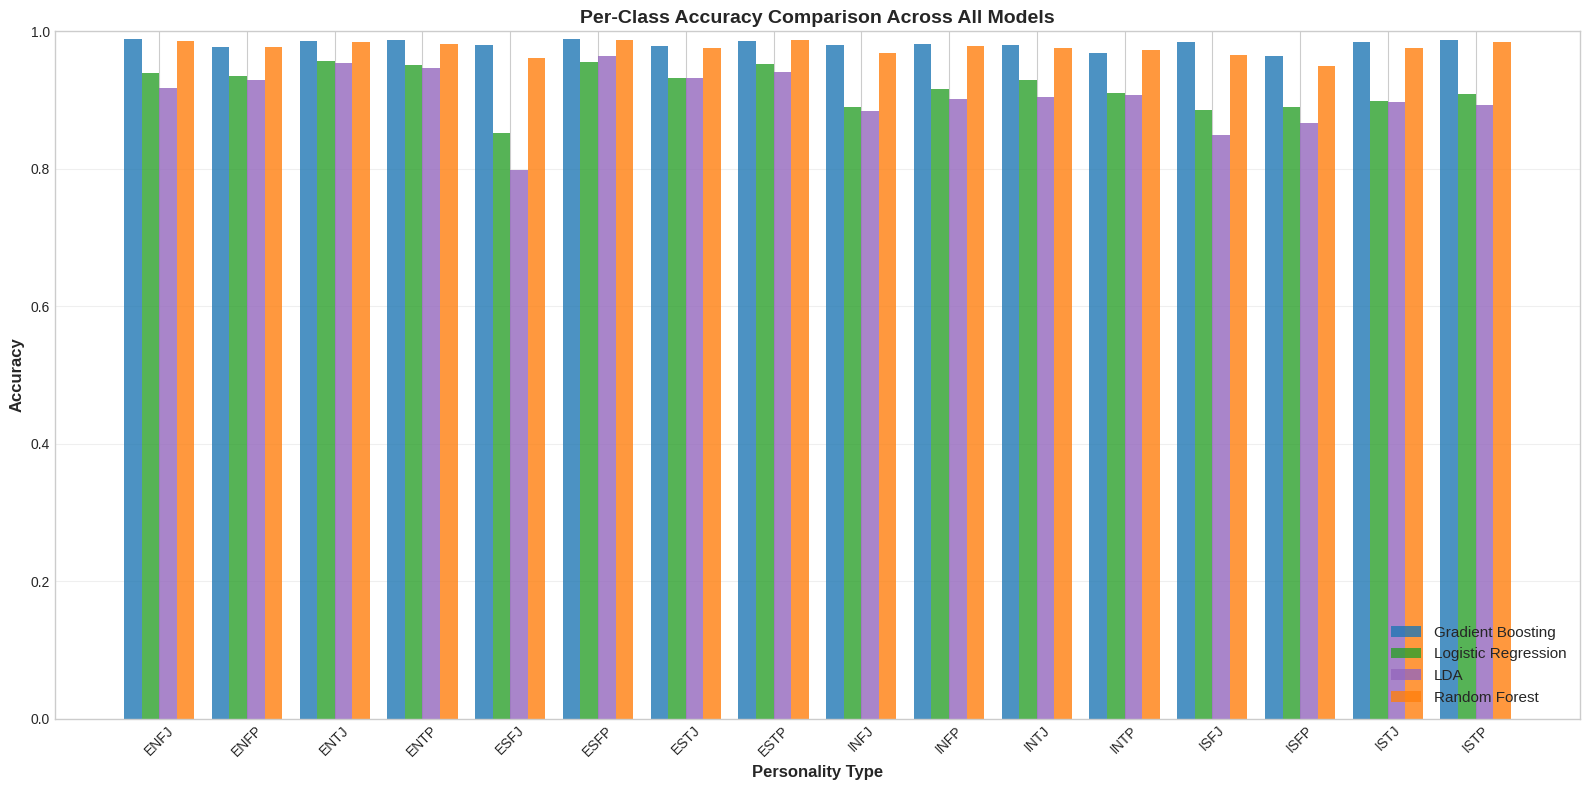

In [ ]:
# Calculate per-class accuracy for all models
xgb_per_class = xgb_cm.diagonal() / xgb_cm.sum(axis=1)
lr_per_class = lr_cm.diagonal() / lr_cm.sum(axis=1)
lda_per_class = lda_cm.diagonal() / lda_cm.sum(axis=1)
rf_per_class = rf_cm.diagonal() / rf_cm.sum(axis=1)

# Create comparison plot
fig, ax = plt.subplots(figsize=(16, 8))

x = np.arange(len(class_names))
width = 0.2

ax.bar(x - 1.5*width, xgb_per_class, width, label='Gradient Boosting', color='#1f77b4', alpha=0.8)
ax.bar(x - 0.5*width, lr_per_class, width, label='Logistic Regression', color='#2ca02c', alpha=0.8)
ax.bar(x + 0.5*width, lda_per_class, width, label='LDA', color='#9467bd', alpha=0.8)
ax.bar(x + 1.5*width, rf_per_class, width, label='Random Forest', color='#ff7f0e', alpha=0.8)

ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_xlabel('Personality Type', fontsize=12, fontweight='bold')
ax.set_title('Per-Class Accuracy Comparison Across All Models', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45)
ax.legend(fontsize=11, loc='lower right')
ax.set_ylim(0, 1)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Feature Importance Comparison (Top 15 Features)

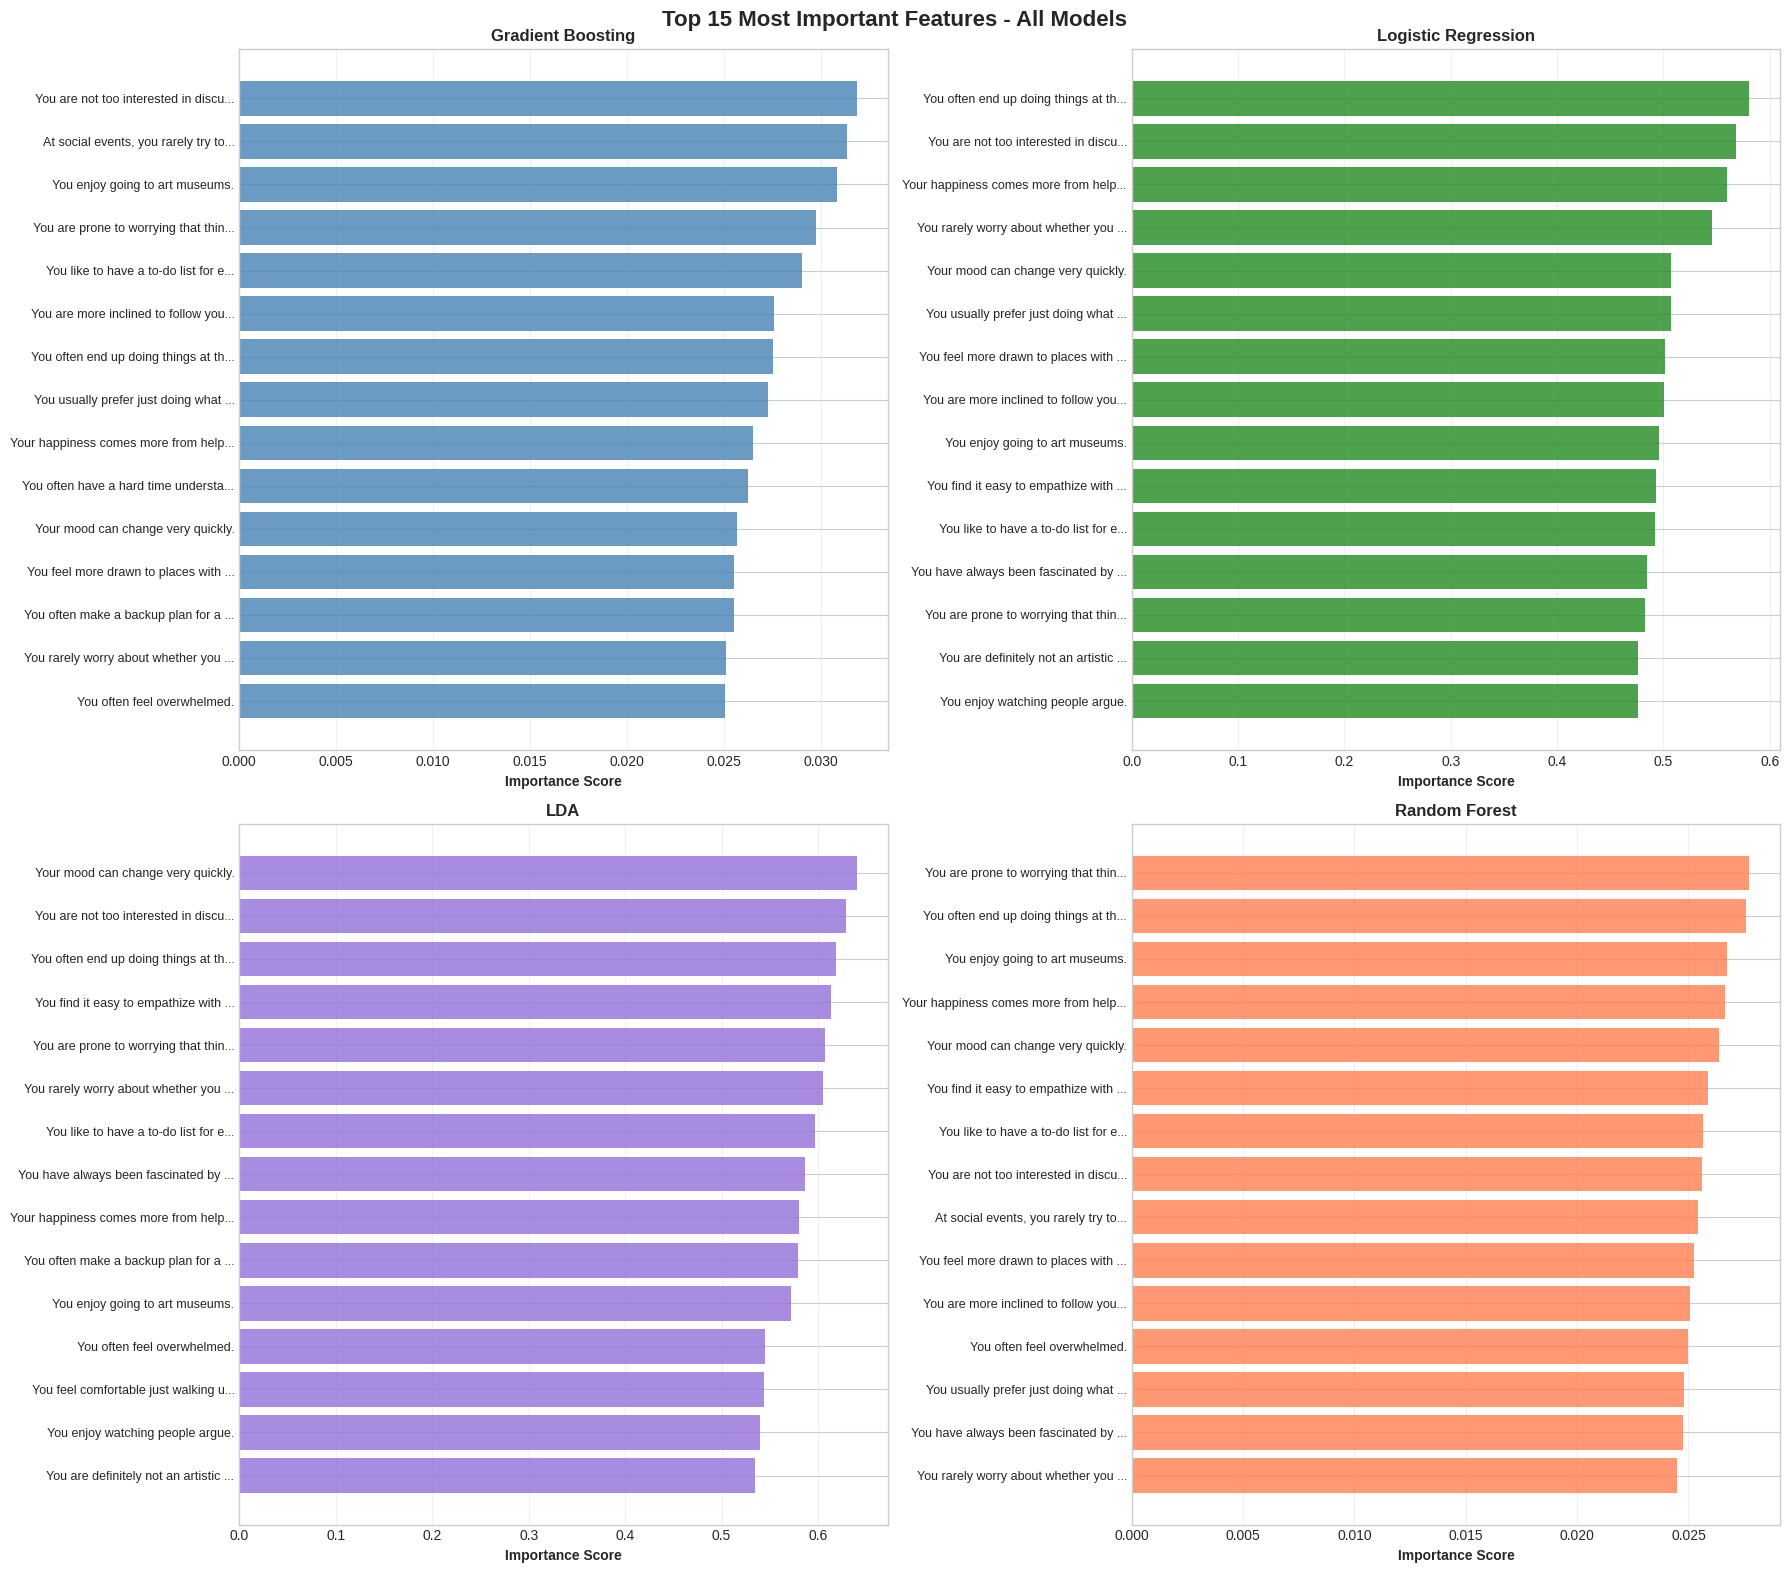

In [ ]:
# Get feature importance from each model
xgb_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

lr_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': np.mean(np.abs(lr_model.coef_), axis=0)
}).sort_values('Importance', ascending=False)

lda_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': np.mean(np.abs(lda_model.coef_), axis=0)
}).sort_values('Importance', ascending=False)

rf_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Display top 15 features for each model
fig, axes = plt.subplots(2, 2, figsize=(18, 16))
fig.suptitle('Top 15 Most Important Features - All Models', fontsize=16, fontweight='bold')

importances = [xgb_importance, lr_importance, lda_importance, rf_importance]
titles = ['Gradient Boosting', 'Logistic Regression', 'LDA', 'Random Forest']
colors_imp = ['steelblue', 'forestgreen', 'mediumpurple', 'coral']

for idx, (importance_df, title, color) in enumerate(zip(importances, titles, colors_imp)):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]

    top_15 = importance_df.head(15)
    short_names = [f[:35] + "..." if len(f) > 35 else f for f in top_15['Feature']]

    ax.barh(range(len(top_15)), top_15['Importance'].values, color=color, alpha=0.8)
    ax.set_yticks(range(len(top_15)))
    ax.set_yticklabels(short_names, fontsize=9)
    ax.invert_yaxis()
    ax.set_xlabel('Importance Score', fontsize=10, fontweight='bold')
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Statistical Summary

In [ ]:
print("=" * 100)
print("STATISTICAL SUMMARY ACROSS ALL MODELS")
print("=" * 100)

summary_stats = comparison_df[['Test Accuracy', 'Macro F1-Score', 'Top-3 Accuracy', 'Overfit Gap']].describe()
print(summary_stats)

print("\n" + "=" * 100)
print("MODEL RANKINGS")
print("=" * 100)

# Rank models by different metrics
metrics_to_rank = ['Test Accuracy', 'Macro F1-Score', 'Top-3 Accuracy']
for metric in metrics_to_rank:
    sorted_df = comparison_df.sort_values(metric, ascending=False)
    print(f"\n{metric}:")
    for rank, (idx, row) in enumerate(sorted_df.iterrows(), 1):
        print(f"  {rank}. {row['Model']:20s} - {row[metric]:.4f}")

# Overfitting ranking (lower is better)
sorted_df = comparison_df.sort_values('Overfit Gap', ascending=True)
print(f"\nLeast Overfitting (Train-Test Gap):")
for rank, (idx, row) in enumerate(sorted_df.iterrows(), 1):
    print(f"  {rank}. {row['Model']:20s} - {row['Overfit Gap']:.4f}")

STATISTICAL SUMMARY ACROSS ALL MODELS
       Test Accuracy  Macro F1-Score  Top-3 Accuracy  Overfit Gap
count       4.000000        4.000000        4.000000     4.000000
mean        0.945444        0.945333        0.987611     0.010104
std         0.038764        0.038884        0.004804     0.009410
min         0.905556        0.905269        0.981444    -0.000266
25%         0.915639        0.915468        0.985028     0.003340
50%         0.947333        0.947259        0.988500     0.011118
75%         0.977139        0.977123        0.991083     0.017882
max         0.981556        0.981543        0.992000     0.018444

MODEL RANKINGS

Test Accuracy:
  1. Gradient Boosting    - 0.9816
  2. Random Forest        - 0.9757
  3. Logistic Regression  - 0.9190
  4. LDA                  - 0.9056

Macro F1-Score:
  1. Gradient Boosting    - 0.9815
  2. Random Forest        - 0.9757
  3. Logistic Regression  - 0.9189
  4. LDA                  - 0.9053

Top-3 Accuracy:
  1. Gradient Boosting

---
## 🎯 Final Recommendations

In [ ]:
print("=" * 100)
print("FINAL RECOMMENDATIONS & KEY INSIGHTS")
print("=" * 100)

# Find best overall model
best_idx = comparison_df['Test Accuracy'].idxmax()
best_model = comparison_df.iloc[best_idx]

print(f"\n🏆 BEST OVERALL MODEL: {best_model['Model']}")
print(f"   Test Accuracy: {best_model['Test Accuracy']:.4f} ({best_model['Test Accuracy']*100:.2f}%)")
print(f"   Macro F1-Score: {best_model['Macro F1-Score']:.4f}")
print(f"   Top-3 Accuracy: {best_model['Top-3 Accuracy']:.4f} ({best_model['Top-3 Accuracy']*100:.2f}%)")
print(f"   Overfitting Gap: {best_model['Overfit Gap']:.4f} ({best_model['Overfit Gap']*100:.2f}%)")

print("\n📊 KEY INSIGHTS:")
print("\n1. ACCURACY PERFORMANCE:")
print(f"   • Highest test accuracy: {comparison_df['Test Accuracy'].max():.4f}")
print(f"   • Lowest test accuracy: {comparison_df['Test Accuracy'].min():.4f}")
print(f"   • Range: {(comparison_df['Test Accuracy'].max() - comparison_df['Test Accuracy'].min()):.4f}")

print("\n2. GENERALIZATION:")
overfitting_models = comparison_df[comparison_df['Overfit Gap'] > 0.05]
if len(overfitting_models) > 0:
    print(f"   • {len(overfitting_models)} model(s) show potential overfitting:")
    for idx, row in overfitting_models.iterrows():
        print(f"     - {row['Model']}: Gap = {row['Overfit Gap']:.4f}")
else:
    print("   • All models generalize well (overfit gap < 5%)")

print("\n3. TOP-3 ACCURACY:")
print(f"   • Best top-3 accuracy: {comparison_df['Top-3 Accuracy'].max():.4f} ({best_top3})")
print(f"   • All models achieve >70% top-3 accuracy" if comparison_df['Top-3 Accuracy'].min() > 0.7 else "")

print("\n4. RECOMMENDATIONS:")
print(f"   • For HIGHEST ACCURACY: Use {best_test_acc}")
print(f"   • For BEST BALANCED PERFORMANCE: Use {best_f1}")
print(f"   • For LEAST OVERFITTING: Use {least_overfit}")

print("\n" + "=" * 100)
print("ANALYSIS COMPLETE")
print("=" * 100)

FINAL RECOMMENDATIONS & KEY INSIGHTS

🏆 BEST OVERALL MODEL: Gradient Boosting
   Test Accuracy: 0.9816 (98.16%)
   Macro F1-Score: 0.9815
   Top-3 Accuracy: 0.9920 (99.20%)
   Overfitting Gap: 0.0184 (1.84%)

📊 KEY INSIGHTS:

1. ACCURACY PERFORMANCE:
   • Highest test accuracy: 0.9816
   • Lowest test accuracy: 0.9056
   • Range: 0.0760

2. GENERALIZATION:
   • All models generalize well (overfit gap < 5%)

3. TOP-3 ACCURACY:
   • Best top-3 accuracy: 0.9920 (Gradient Boosting)
   • All models achieve >70% top-3 accuracy

4. RECOMMENDATIONS:
   • For HIGHEST ACCURACY: Use Gradient Boosting
   • For BEST BALANCED PERFORMANCE: Use Gradient Boosting
   • For LEAST OVERFITTING: Use LDA

ANALYSIS COMPLETE


---
## 📁 Export Results

In [ ]:
# Save comparison results to CSV
comparison_df.to_csv('model_comparison_results.csv', index=False)
print("✓ Saved: model_comparison_results.csv")

# Save per-class accuracies
per_class_df = pd.DataFrame({
    'Personality Type': class_names,
    'Gradient Boosting': xgb_per_class,
    'Logistic Regression': lr_per_class,
    'LDA': lda_per_class,
    'Random Forest': rf_per_class
})
per_class_df.to_csv('per_class_accuracy_comparison.csv', index=False)
print("✓ Saved: per_class_accuracy_comparison.csv")

print("\n✅ All results exported successfully!")

✓ Saved: model_comparison_results.csv
✓ Saved: per_class_accuracy_comparison.csv

✅ All results exported successfully!


In [ ]:
# ========================================
# EXPORT TO PDF AND AUTO-DOWNLOAD (Colab)
# ========================================
from google.colab import files
import os

# Install required packages for PDF conversion
!pip install -q nbconvert[webpdf]
!playwright install chromium

# Save the current notebook first
from google.colab import _message
notebook_path = _message.blocking_request('get_ipynb')['ipynb']

# Write notebook to file
import json
notebook_name = 'ML_Comparison_Analysis'
with open(f'/content/{notebook_name}.ipynb', 'w') as f:
    json.dump(notebook_path, f)

# Convert to PDF using webpdf (works better in Colab)
!jupyter nbconvert --to webpdf --allow-chromium-download "/content/{notebook_name}.ipynb"

# Auto-download the PDF
pdf_file = f'/content/{notebook_name}.pdf'
if os.path.exists(pdf_file):
    files.download(pdf_file)
    print(f"✓ Downloaded: {notebook_name}.pdf")
else:
    print("PDF not found. Try the HTML method below:")
    # Fallback: HTML then print to PDF manually
    !jupyter nbconvert --to html "/content/{notebook_name}.ipynb"
    files.download(f'/content/{notebook_name}.html')
    print("Download the HTML and use browser's Print > Save as PDF")

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/jsonschema/_format.py", line 304, in <module>
    import rfc3987
ModuleNotFoundError: No module named 'rfc3987'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/lark/visitors.py", line 115, in _call_userfunc
    f = getattr(self, tree.data)
        ^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: 'PrepareAnonTerminals' object has no attribute 'expr'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 4, in <module>
    from nbconvert.nbconvertapp import main
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/__init__.py", line 6, in <module>
    from . import filters, postprocessors, preprocessors, writers
  File "/usr/local/lib/python3.12/dist-packages/nbconvert/filters/__init__.py", line 8, in <module>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download the HTML and use browser's Print > Save as PDF
